# 不同session各channel的平均firing rate

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import itertools
from dataPreprocess import read_dataset
%matplotlib inline  

sns.set_theme(style='whitegrid', font_scale=2)

In [2]:
folderPath = './data'
fileList = sorted([i for i in os.listdir(folderPath) if i.endswith('.pkl.zip')])

m1s = []
for idx, fileName in enumerate(fileList):
    dataset = read_dataset(os.path.join(folderPath, fileName), ['position_x'])

    m1 = dataset['m1'][:, -1, :]
    m1 = np.mean(m1, axis=0)

    m1s.append(m1)
m1s = np.vstack(m1s)

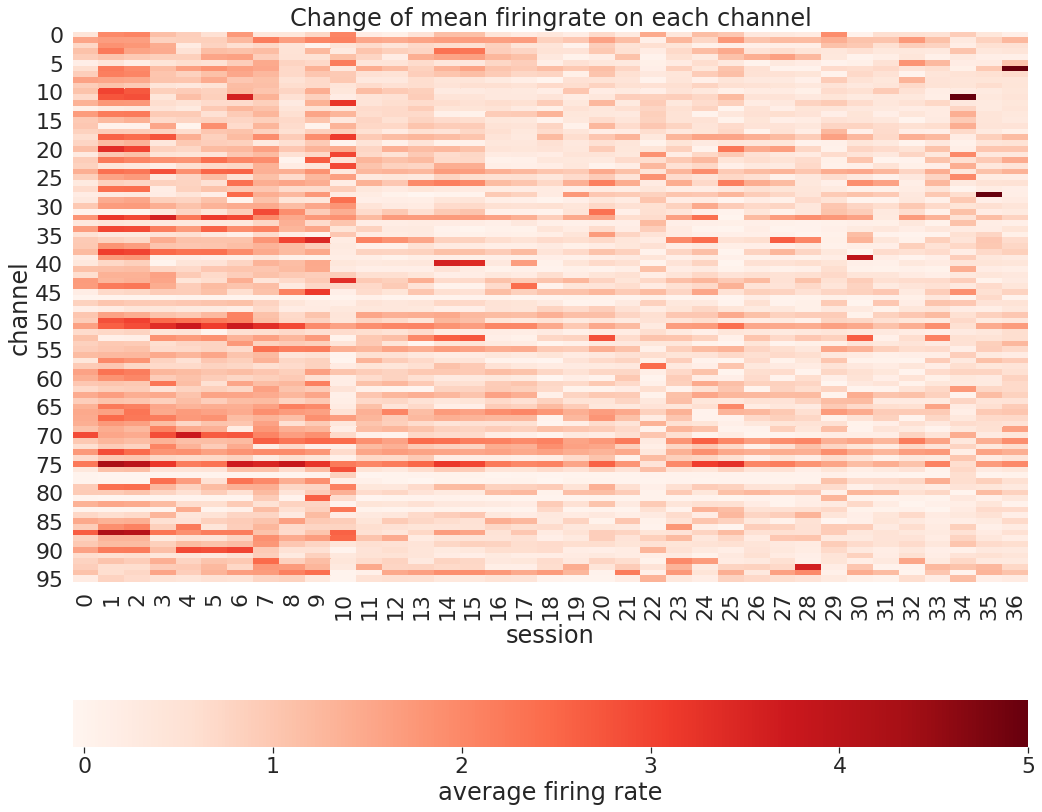

In [3]:
plt.figure(figsize=(15, 12))
sns.heatmap(m1s.T, cmap='Reds', vmax=5, cbar_kws={"orientation": "horizontal", 'label': 'average firing rate'})
plt.ylabel('channel')
plt.xlabel('session')
plt.title('Change of mean firingrate on each channel')
plt.tight_layout()